In [1]:
from sklearn.linear_model import LogisticRegression
import utils
from sklearn.metrics import matthews_corrcoef

In [2]:
path = r"../data_files/ecq_B_1000_all_one_per_iso_1_524287.parquet"
df = utils.load_data(path)



Loaded the big dataset with 1000 a_p's and 2164705 curves..


In [3]:
# choose your desired bounds (including the end points)
bounds_list = [(2**i,2**(i+1)) for i in range(10, 13)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired step size for number of a_p's
step_size = 25

# choose your metric
metric = matthews_corrcoef

res_dict = {}
# Example usage
# utils.plot_side_by_side(bounds_list, df, model, step_size)
# Example usage
# utils.plot_on_same_graph(bounds_list, df, model, step_size)
for bounds in bounds_list:
   lower_bound, upper_bound = bounds
   res_dict[bounds] = utils.Generate_AccByNumAps_df(df, lower_bound, upper_bound, model, step_size = step_size, metric=metric)

**************************************************
Generating the accuracy by the number of a_p's dataframe for range [1024, 2048]..
There are 3463 curves within the conductor range [1024, 2048].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [2048, 4096]..
There are 7747 curves within the conductor range [2048, 4096].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


**************************************************
Generating the accuracy by the number of a_p's dataframe for range [4096, 8192]..
There are 16769 curves within the conductor range [4096, 8192].


/Users/angelicababei/ml_rnt/notebooks/utils.py:112: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'performance': res}, index = [0])], ignore_index = True)


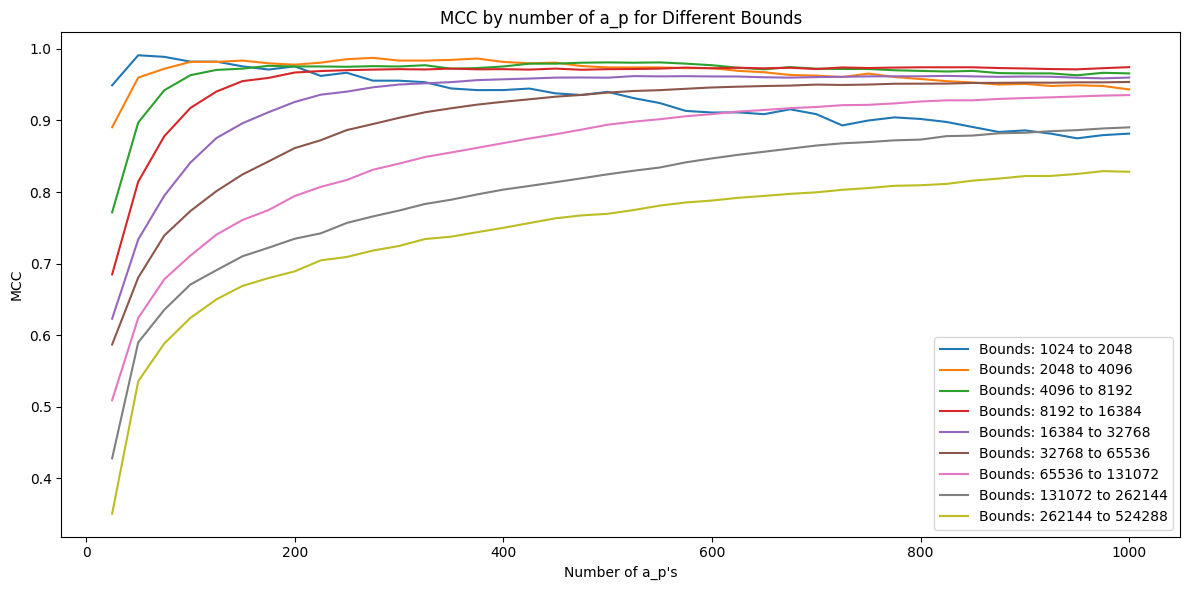

In [17]:
utils.plot_AccuracycByNumAps(res_dict, metric_name = metric.__name__)

In [19]:
import plotly.graph_objects as go
import plotly.io as pio


# Save the figure to an HTML file
pio.write_html(fig, file='MCC_nap_geometric.html', auto_open=True)